<a href="https://colab.research.google.com/github/hayathhh/FACERECOGNITION/blob/main/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read dataset and visualizite

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/data/face_data.csv'
df = pd.read_csv(path)


Importing Modules and Libraries

In [41]:
import numpy as np #pour manipuler les matrices et les tableaux multidimensionnels
import pandas as pd #pour manipuler et analyser les données 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from skimage.util import random_noise
import torchvision.transforms as transforms

Defining functions

In [4]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

In [5]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC" + str(i+1))
    plt.show()

Showing Data Matrix

In [7]:
print(df.head())

          0         1         2         3  ...      4093      4094      4095  target
0  0.309917  0.367769  0.417355  0.442149  ...  0.152893  0.161157  0.157025       0
1  0.454545  0.471074  0.512397  0.557851  ...  0.152893  0.152893  0.152893       0
2  0.318182  0.400826  0.491736  0.528926  ...  0.140496  0.148760  0.152893       0
3  0.198347  0.194215  0.194215  0.194215  ...  0.752066  0.752066  0.739669       0
4  0.500000  0.545455  0.582645  0.623967  ...  0.177686  0.173554  0.173554       0

[5 rows x 4097 columns]


Showing  Images

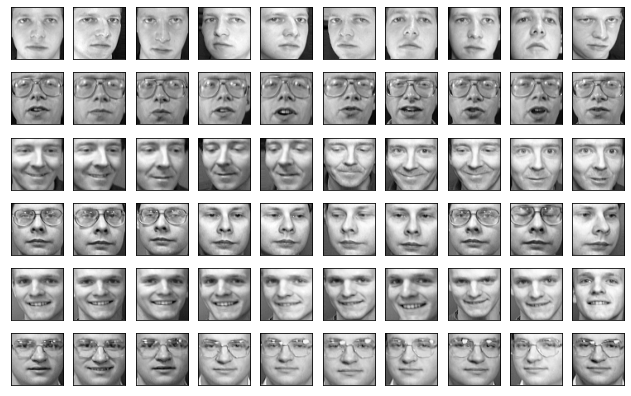

In [8]:
labels= df["target"]
pixels= df.drop(["target"],axis=1)
show_orignal_images(pixels)

Adding Noise to Image Data


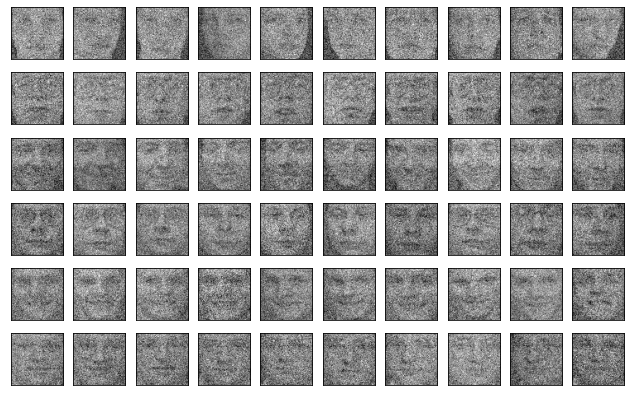

In [45]:
#np.random.seed(60)
noisy =pixels + np.random.normal(pixels,0.5)
show_orignal_images(noisy)


 Split Dataset into training and testing

In [46]:
x_train, x_test, y_train, y_test = train_test_split(noisy,labels)

 Perform PCA on the noisy data

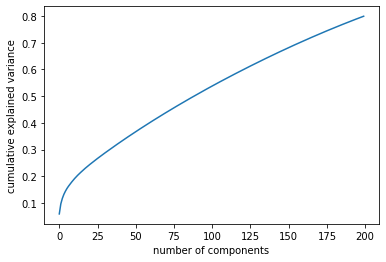

In [48]:
pca = PCA(n_components=200).fit(x_train)
#cette fctn nous aide de selectionner les  k meilleurs eigen faces pour représenter training set
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


Showing eigenfaces

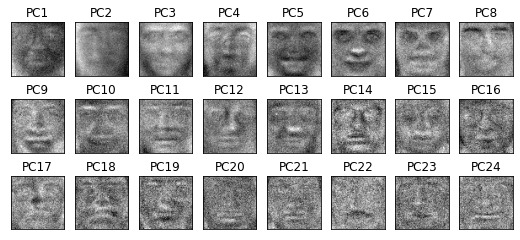

In [49]:
show_eigenfaces(pca)

Projecting the input data on the eigenfaces orthonormal basis

In [50]:
Xtrain_pca = pca.transform(x_train)

In [51]:
## Step 5: create a SVM Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
#Train the model using the training sets
clf = clf.fit(Xtrain_pca, y_train) 
#apply pca to testing sets 
Xtest_pca = pca.transform(x_test)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_pca)# 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.20      0.33         5
           7       1.00      0.33      0.50         3
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         1
          10       0.75      1.00      0.86         3
          11       1.00      0.50      0.67         2
          12       0.33      1.00      0.50         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         1
          17       0.25    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


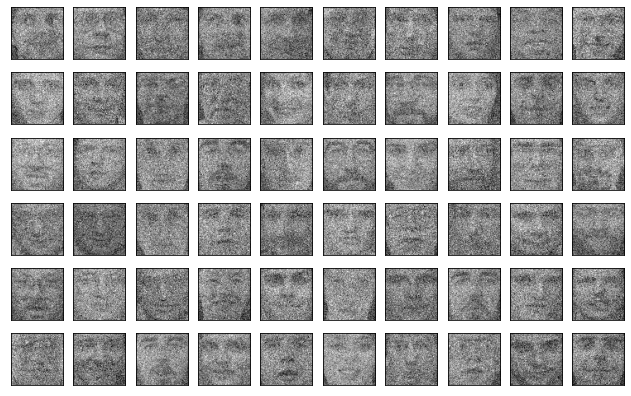


************************** Images after reconstuction****************************



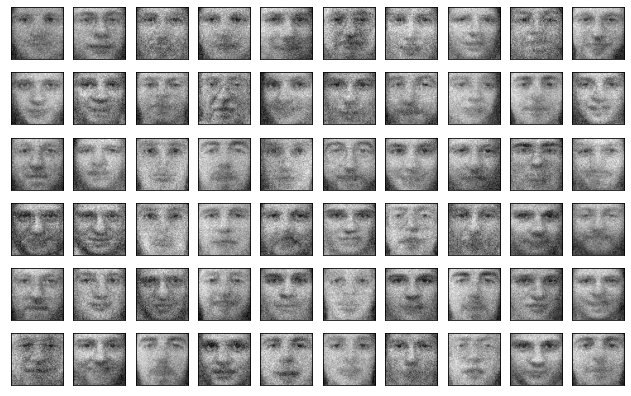

In [52]:
Xtest_pca = pca.transform(x_test)
projected = pca.inverse_transform(Xtest_pca)
show_orignal_images(x_test)

print('\n************************** Images after reconstuction****************************\n')
show_orignal_images(projected )